# Bigram character level Language modeling:

### topics in below notebook:
### ----------------------------------------
1. Bigram character level Language modeling:

        # numerical approach
        # Neural network approach
        # creation of dataset
        # model building and loss calculation
        # evaluation of model performance

In [2]:
import torch
import numpy as np
import pandas as pd
import os


### Data Preprocessing:

In [26]:
# read files
with open("names.txt", 'r') as f:
    words = f.read()
    print("read file contain:---> \n",words[:20])
    # split in lines
    words = words.splitlines()
    print("create list of words:-----> \n",words[:10])

    print(f"length of the words in the file:---> {len(words)}")
    mx, mn = max([len(word) for word in words]),min([len(word) for word in words])

    print(f"max, min length of word:-> {mx},{mn}")

read file contain:---> 
 emma
olivia
ava
isab
create list of words:-----> 
 ['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']
length of the words in the file:---> 32033
max, min length of word:-> 15,2


In [ ]:
### create Vocabulary:

In [35]:
# CHARACTER SEQUENCE:

for word in words[:1]:
    print(f"word: {word}")
    print(f"char sequence in word:-->")
    for ch1,ch2 in zip(word,word[1:]):
        print(f" {ch1,ch2}")
    

word: emma
char sequence in word:-->
 ('e', 'm')
 ('m', 'm')
 ('m', 'a')


In [38]:
# add special character

for word in words[:1]:
    word = ['<S>'] + list(word) + ['<E>']
    print(f"word: {"".join(word)}")
    print(f"char sequence in word:-->")
    for ch1,ch2 in zip(word,word[1:]):
        print(f"{ch1,ch2}")

word: <S>emma<E>
char sequence in word:-->
('<S>', 'e')
('e', 'm')
('m', 'm')
('m', 'a')
('a', '<E>')


In [55]:
# add special character for first 3 words
d = {}
for word in words[:3]:
    word = ['<S>'] + list(word) + ['<E>']
    print(f"word: {"".join(word)}")
    print(f"char sequence in word:-->")
    for ch1,ch2 in zip(word,word[1:]):
        print(f"{ch1,ch2}")
        bigram = (ch1,ch2)
        # below for nonexisting key d.get(key, 0 )
        # will assigne the 0 value corrospond to nonexisting key
        d[bigram] = d.get(bigram, 0) +1
print(f"the no of counts of the perticular seq of char in word \n-> {d}")


word: <S>emma<E>
char sequence in word:-->
('<S>', 'e')
('e', 'm')
('m', 'm')
('m', 'a')
('a', '<E>')
word: <S>olivia<E>
char sequence in word:-->
('<S>', 'o')
('o', 'l')
('l', 'i')
('i', 'v')
('v', 'i')
('i', 'a')
('a', '<E>')
word: <S>ava<E>
char sequence in word:-->
('<S>', 'a')
('a', 'v')
('v', 'a')
('a', '<E>')
the no of counts of the perticular seq of char in word 
-> {('<S>', 'e'): 1, ('e', 'm'): 1, ('m', 'm'): 1, ('m', 'a'): 1, ('a', '<E>'): 3, ('<S>', 'o'): 1, ('o', 'l'): 1, ('l', 'i'): 1, ('i', 'v'): 1, ('v', 'i'): 1, ('i', 'a'): 1, ('<S>', 'a'): 1, ('a', 'v'): 1, ('v', 'a'): 1}


In [127]:
# do it for all the words in file

d = {}
for word in words:
    word = ['<S>'] + list(word) + ['<E>']
    print(f"word: {"".join(word)}")
    print(f"char sequence in word:-->")
    for ch1,ch2 in zip(word,word[1:]):
        print(f"{ch1,ch2}")
        bigram = (ch1,ch2)
        # below for nonexisting key in dict = d 
        # d.get(key, 0 ) will assigne the 0 value 
        # corrospond to nonexisting key
        d[bigram] = d.get(bigram, 0) +1
print(f"the no of counts of the perticular seq of char in word \n-> {d}")




# sort the dict having the consicutive sequence of char and its count

s_d = sorted(d.items(), key=lambda kv:kv[1], reverse= True)

word: <S>emma<E>
char sequence in word:-->
('<S>', 'e')
('e', 'm')
('m', 'm')
('m', 'a')
('a', '<E>')
word: <S>olivia<E>
char sequence in word:-->
('<S>', 'o')
('o', 'l')
('l', 'i')
('i', 'v')
('v', 'i')
('i', 'a')
('a', '<E>')
word: <S>ava<E>
char sequence in word:-->
('<S>', 'a')
('a', 'v')
('v', 'a')
('a', '<E>')
word: <S>isabella<E>
char sequence in word:-->
('<S>', 'i')
('i', 's')
('s', 'a')
('a', 'b')
('b', 'e')
('e', 'l')
('l', 'l')
('l', 'a')
('a', '<E>')
word: <S>sophia<E>
char sequence in word:-->
('<S>', 's')
('s', 'o')
('o', 'p')
('p', 'h')
('h', 'i')
('i', 'a')
('a', '<E>')
word: <S>charlotte<E>
char sequence in word:-->
('<S>', 'c')
('c', 'h')
('h', 'a')
('a', 'r')
('r', 'l')
('l', 'o')
('o', 't')
('t', 't')
('t', 'e')
('e', '<E>')
word: <S>mia<E>
char sequence in word:-->
('<S>', 'm')
('m', 'i')
('i', 'a')
('a', '<E>')
word: <S>amelia<E>
char sequence in word:-->
('<S>', 'a')
('a', 'm')
('m', 'e')
('e', 'l')
('l', 'i')
('i', 'a')
('a', '<E>')
word: <S>harper<E>
char sequ

In [194]:
# explanation of lambda function
def add(a,b):
    return a+b
ADD = lambda a,b :a+b
print(add(2,3), ADD(2,3))


# below for nonexisting key in dict = d 
# d.get(key, x ) will assigne the x value 
# corrospond to nonexisting key in dict
# only work with non existing key
dic = {'a':1,'b':2}
print(dic.get('e',3), dic.get('a'), dic.get('a',100))



# sort a list of tuple wrt to its index 1 values
t = [('f', 10), ('b', 3), ('a', 5)]
print(f"t sorted-->{sorted(t)}")
print(f"t sorted wrt index 1-->{sorted(t, key= lambda kv:kv[1])}")

# sort a dict wrt its values 
# convert dict in list of tuples of ky value pair than sort
dic= {'f':10,'b':3,'c':5}
print(f"sorted dict wrt to key--> {dict(sorted(dic.items()))}")

print(f"sorted dict wrt to value--> {dict(sorted(dic.items()), key = lambda k:k[1])}")



# boot strap approach
lst = []
for value in sorted(dic.values()):
    for item in dic.items():
        print(item)
        if value in item:
            lst.append(item)

print(dict(lst))


# set

strr =  "manishnegimanisghinegi"
print(f"str--->{strr}")
print(f"set of str -->: {set(strr)}")

5 5
3 1 1
t sorted-->[('a', 5), ('b', 3), ('f', 10)]
t sorted wrt index 1-->[('b', 3), ('a', 5), ('f', 10)]
sorted dict wrt to key--> {'b': 3, 'c': 5, 'f': 10}
sorted dict wrt to value--> {'b': 3, 'c': 5, 'f': 10, 'key': <function <lambda> at 0x000002364EBEF600>}
('f', 10)
('b', 3)
('c', 5)
('f', 10)
('b', 3)
('c', 5)
('f', 10)
('b', 3)
('c', 5)
{'b': 3, 'c': 5, 'f': 10}
str--->manishnegimanisghinegi
set of str -->: {'g', 'e', 's', 'a', 'n', 'm', 'h', 'i'}


In [134]:
print(f"char seq and its sorted count:-->\n {s_d[:5]}")

char seq and its sorted count:-->
 [(('n', '<E>'), 6763), (('a', '<E>'), 6640), (('a', 'n'), 5438), (('<S>', 'a'), 4410), (('e', '<E>'), 3983)]


In [164]:
# array representation of the s_d
import torch
a = torch.zeros(2,2, dtype= torch.int32)
print(f"array:\n {a}")

a[1,1]=100
print(f"array:\n {a}")

print(f"--------------------")
a[0,0] = a[1,1]*2
print(f"--------------------")
print(f"array:\n {a}")

a[1,:]
print(f"--------------------")
print(f"array 1st row:\n {a[0,:]}")
print(f"array 2st row:\n {a[1,:]}")


print(f"--------------------")
print(f"array 1st col:\n {a[:,0]}")
print(f"array 2st col:\n {a[:,1]}")


print(f"items of array : {a[0,0].item(), a[1,1].item()}")

array:
 tensor([[0, 0],
        [0, 0]], dtype=torch.int32)
array:
 tensor([[  0,   0],
        [  0, 100]], dtype=torch.int32)
--------------------
--------------------
array:
 tensor([[200,   0],
        [  0, 100]], dtype=torch.int32)
--------------------
array 1st row:
 tensor([200,   0], dtype=torch.int32)
array 2st row:
 tensor([  0, 100], dtype=torch.int32)
--------------------
array 1st col:
 tensor([200,   0], dtype=torch.int32)
array 2st col:
 tensor([  0, 100], dtype=torch.int32)
items of array : (200, 100)


In [163]:
(f"items of array : {a[0,0].item(), a[1,1].item()}")

'items of array : (200, 100)'

In [201]:
# total unique char in the the all words in file
print(f"1----> {"".join(words)}")
print(f"2---> {set("".join(words))}")
print(f"3--->{sorted(set("".join(words)))}")


1----> emmaoliviaavaisabellasophiacharlottemiaameliaharperevelynabigailemilyelizabethmilaellaaverysofiacamilaariascarlettvictoriamadisonlunagracechloepenelopelaylarileyzoeynoralilyeleanorhannahlillianaddisonaubreyelliestellanataliezoeleahhazelvioletaurorasavannahaudreybrooklynbellaclaireskylarlucypaisleyeverlyannacarolinenovagenesisemiliakennedysamanthamayawillowkinsleynaomiaaliyahelenasaraharianaallisongabriellaalicemadelyncorarubyevaserenityautumnadelinehaileygiannavalentinaislaelianaquinnnevaehivysadiepiperlydiaalexajosephineemeryjuliadelilahariannaviviankayleesophiebriellemadelinepeytonryleeclarahadleymelaniemackenziereaganadalynnlilianaaubreejadekatherineisabellenataliaraelynnmariaathenaximenaaryaleilanitaylorfaithrosekyliealexandramarymargaretlylaashleyamayaelizabriannabaileyandreakhloejasminemelodyirisisabelnorahannabellevaleriaemersonadalynryleighedenemersynanastasiakaylaalyssajulianacharlieestherarielceciliavaleriealinamollyreesealiyahlillyparkerfinleymorgansydneyjordyneloiset

In [209]:
chars = sorted(set("".join(words)))
print(f"unique chars-->{chars}")

stoi  = {c: idx for idx, c in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27
print(f"unique chars dict {stoi}")
print(f"total unique chars {len(stoi)}")

unique chars-->['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
unique chars dict {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25, '<S>': 26, '<E>': 27}
total unique chars 28


### Numerical Approach:

In [226]:
# create 28*28 array
# x-aixs will hv unique chrs 0 to 27
# y-axis will hv unique chrs 0 to 27

# each entry in array N wrt N(r,c) = no of counts of 
# consicutive seq of chr r->c came in the file of words
# for examp
# ('<S>', 'e'): 1531
# r= <S> = 26
# c= e = 4
# so N(26,4) = 1531 in the array
# which is the count when e precided by <s> in the file of words

import torch
N = torch.zeros(28,28, dtype = torch.int32)

for word in words[:1]:
    word = ['<S>'] + list(word) + ['<E>']
    print(word)
    for ch1,ch2 in zip(word,word[1:]):
        print(ch1,ch2)
        print(stoi[ch1],stoi[ch2])
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        N[ix1,ix2] +=1

print('N[<S> e]=N[26, 4]-->',N[26, 4].item())




['<S>', 'e', 'm', 'm', 'a', '<E>']
<S> e
26 4
e m
4 12
m m
12 12
m a
12 0
a <E>
0 27
N[<S> e]=N[26, 4]--> 1


In [228]:
# for all will do it

import torch
N = torch.zeros(28,28, dtype = torch.int32)

for word in words:
    word = ['<S>'] + list(word) + ['<E>']
    #print(word)
    for ch1,ch2 in zip(word,word[1:]):
        #print(ch1,ch2)
        #print(stoi[ch1],stoi[ch2])
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        N[ix1,ix2] +=1

print('N[<S> e]=N[26, 4]-->',N[26, 4].item())

N[<S> e]=N[26, 4]--> 1531


In [229]:
print(f"shape of N {N.shape}")

shape of N torch.Size([28, 28])


In [231]:
corr = pd.DataFrame(N)
corr

0     1     2     3     4    5    6     7     8     9   ...    18    19  \
0    556   541   470  1042   692  134  168  2332  1650   175  ...  1118   687   
1    321    38     1    65   655    0    0    41   217     1  ...     8     2   
2    815     0    42     1   551    0    2   664   271     3  ...     5    35   
3   1303     1     3   149  1283    5   25   118   674     9  ...    29     4   
4    679   121   153   384  1271   82  125   152   818    55  ...   861   580   
5    242     0     0     0   123   44    1     1   160     0  ...     6    18   
6    330     3     0    19   334    1   25   360   190     3  ...    30    31   
7   2244     8     2    24   674    2    2     1   729     9  ...    31    71   
8   2445   110   509   440  1653  101  428    95    82    76  ...  1316   541   
9   1473     1     4     4   440    0    0    45   119     2  ...     7     2   
10  1731     2     2     2   895    1    0   307   509     2  ...    95    17   
11  2623    52    25   138  2921   22    6    19  2480     6  ...    94    77   
12  2590   112    51    24   818    1    0     5  1256     7  ...    35     4   
13  2977     8   213   704  1359   11  273    26  1725    44  ...   278   443   
14   149   140   114   190   132   34   44   171    69    16  ...   504   118   
15   209     2     1     0   197    1    0   204    61     1  ...    16    17   
16    13     0     0     0     1    0    0     0    13     0  ...     2     0   
17  2356    41    99   187  1697    9   76   121  3033    25  ...   190   208   
18  1201    21    60     9   884    2    2  1285   684     2  ...   461   765   
19  1027     1    17     0   716    2    2   647   532     3  ...    35   374   
20   163   103   103   136   169   19   47    58   121    14  ...   474    82   
21   642     1     0     1   568    0    0     1   911     0  ...     0     0   
22   280     1     0     8   149    2    1    23   148     0  ...    20     8   
23   103     1     4     5    36    3    0     1   102     0  ...    31    70   
24  2143    27   115   272   301   12   30    22   192    23  ...   401   104   
25   860     4     2     2   373    0    1    43   364     2  ...     4     4   
26  4410  1306  1542  1690  1531  417  669   874   591  2422  ...  2055  1308   
27     0     0     0     0     0    0    0     0     0     0  ...     0     0   

     20   21   22   23    24   25  26    27  
0   381  834  161  182  2050  435   0  6640  
1    45    0    0    0    83    0   0   114  
2    35    0    0    3   104    4   0    97  
3    92   17   23    0   317    1   0   516  
4    69  463   50  132  1070  181   0  3983  
5    10    0    4    0    14    2   0    80  
6    85    1   26    0    31    1   0   108  
7   166   39   10    0   213   20   0  2409  
8   109  269    8   89   779  277   0  2489  
9   202    5    6    0    10    0   0    71  
10   50    2   34    0   379    2   0   363  
11  324   72   16    0  1588   10   0  1314  
12  139    3    2    0   287   11   0   516  
13   96   55   11    6   465  145   0  6763  
14  275  176  114   45   103   54   0   855  
15    4    0    0    0    12    0   0    33  
16  206    0    3    0     0    0   0    28  
17  252   80   21    3   773   23   0  1377  
18  185   14   24    0   215   10   0  1169  
19   78   15   11    2   341  105   0   483  
20    3   37   86   34    13   45   0   155  
21    7    7    0    0   121    0   0    88  
22   25    0    2    0    73    1   0    51  
23    5    0    3   38    30   19   0   164  
24  141  106    4   28    23   78   0  2007  
25   73    2    3    1   147   45   0   160  
26   78  376  307  134   535  929   0     0  
27    0    0    0    0     0    0   0     0  

[28 rows x 28 columns]

In [241]:
itos = {idx:c for c, idx in stoi.items()}

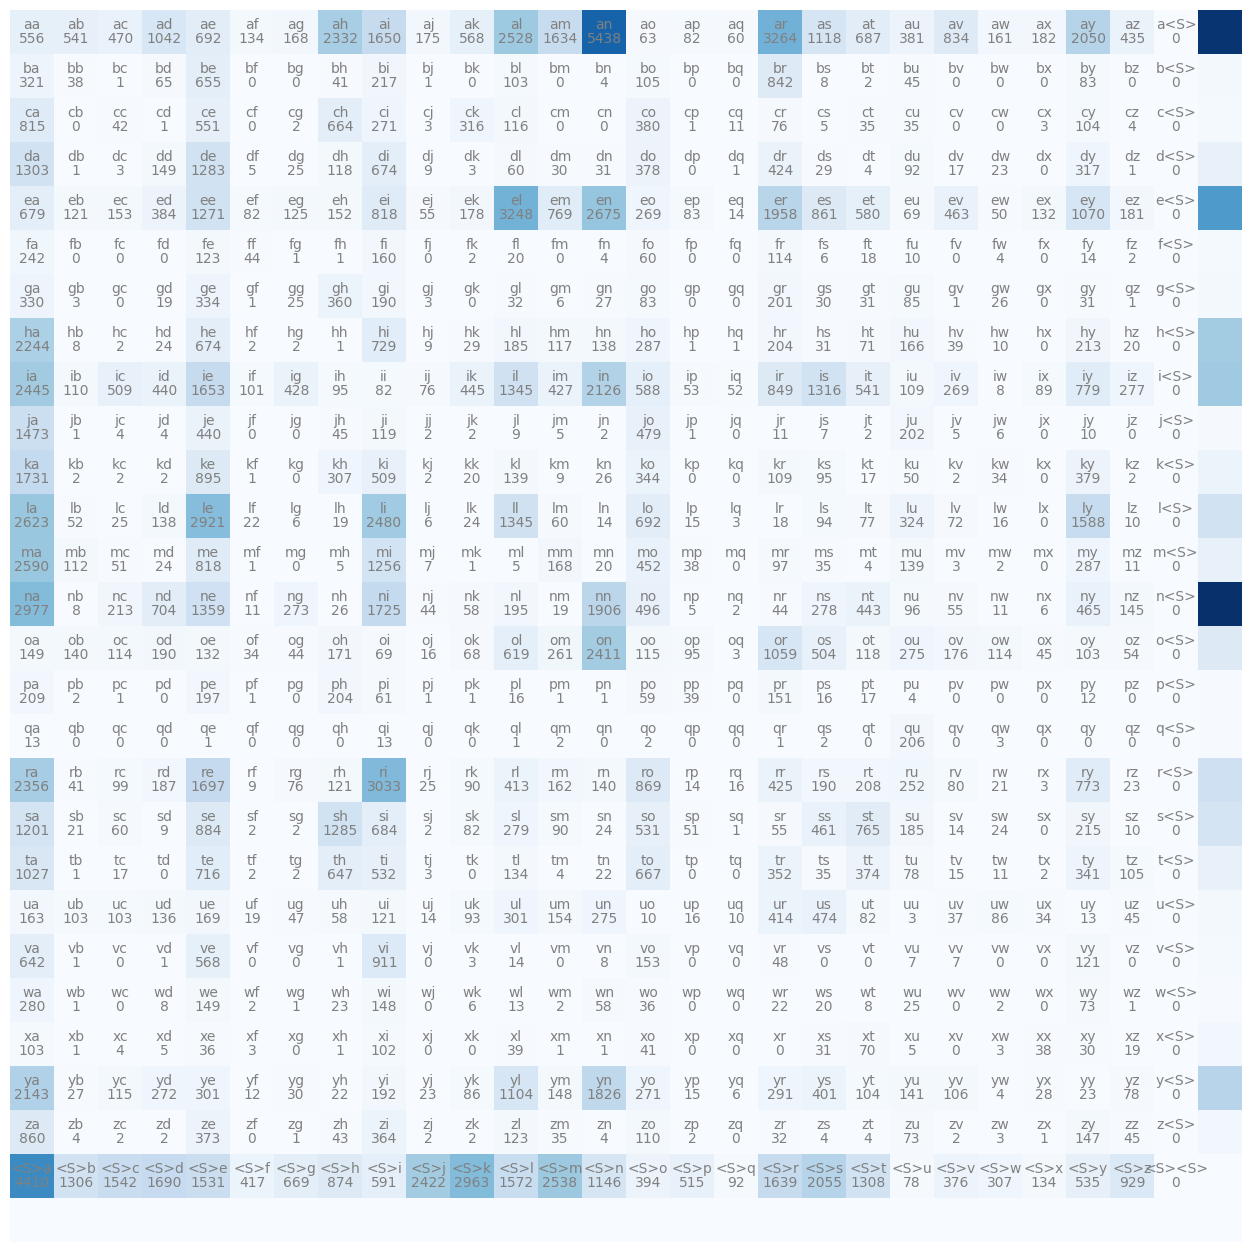

In [242]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

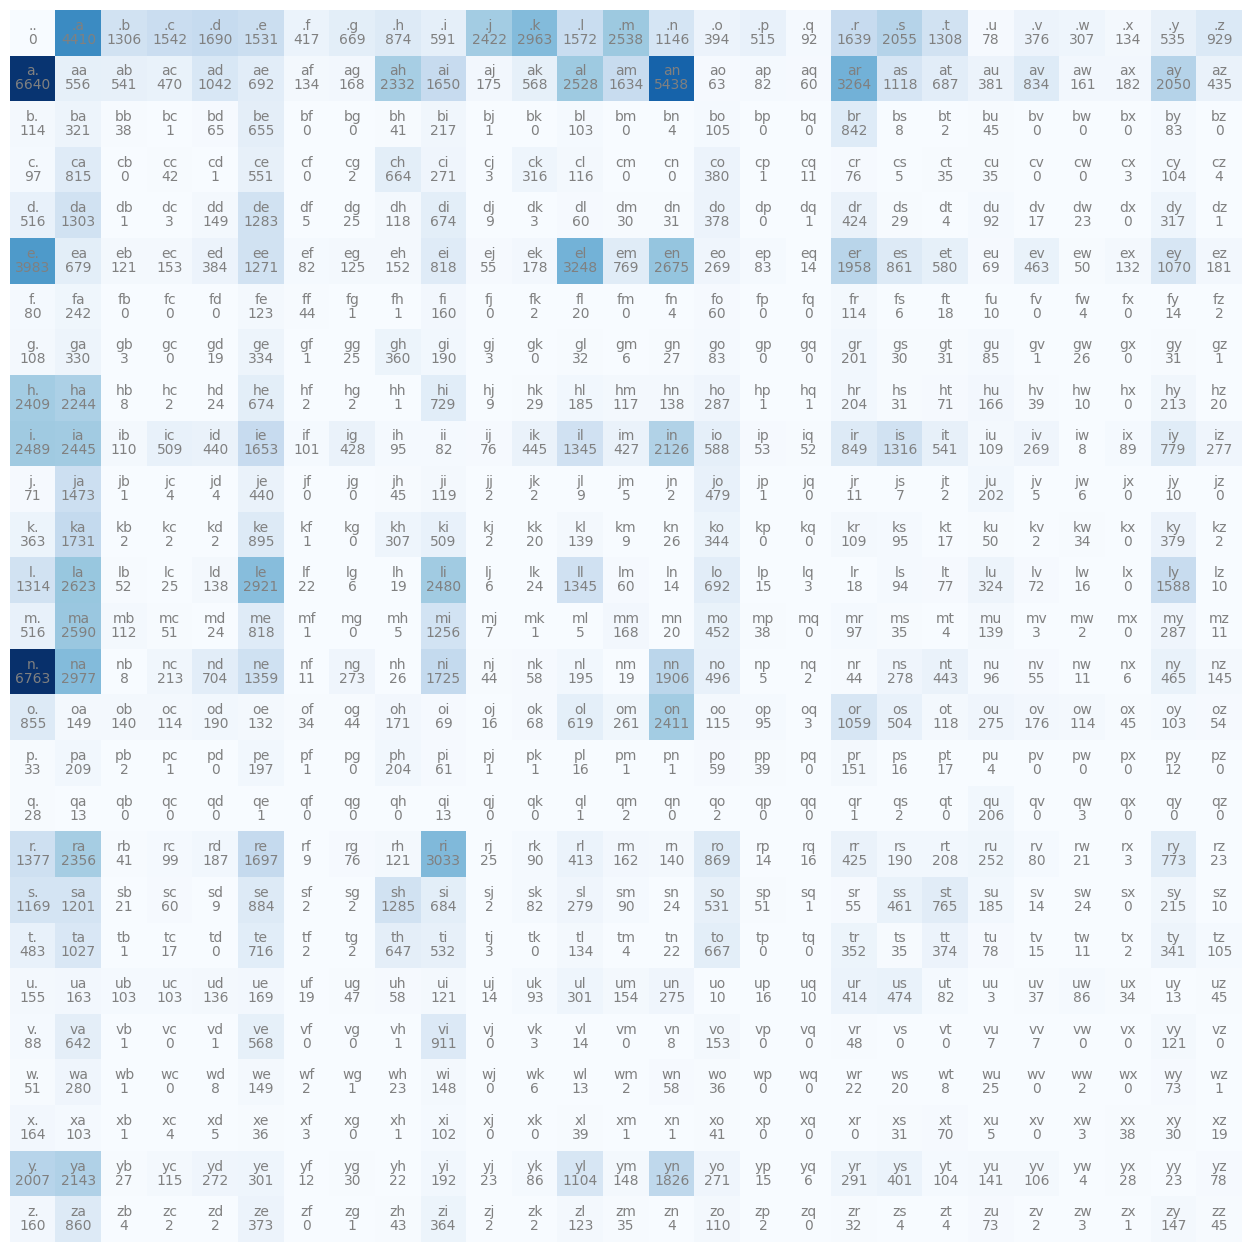

In [248]:
# in the below code we smpliy remove the start token and end token 
# and replace <S> and<E> with "." so that we have only one token to
# represent start and end
# stoi['.'] = 0
# chs = ['.'] + list(w) + ['.']


import torch

N = torch.zeros((27, 27), dtype=torch.int32)

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1


import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');


In [258]:
# the above digram show how 2hd character follows 1st character in the word
# 1st row where how many times each char occured in collection of different words 

print(f"1st row represents how many times each char occured in collection of different words: \n {N[0,:]}")



p = N[0]
p = p/p.sum()
print(f"convert it into prob:->\n {p}")
print(f"sum----->{p.sum()}")


1st row represents how many times each char occured in collection of different words: 
 tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)
convert it into prob:->
 tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])
sum----->1.0


**torch.multinomial**

In [300]:
#torch.multinomial its gives random samples based on the prob given to it
#genrator is used to give same random ness

g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
print('p=',p)
print(f"p.sum = {p.sum()}")
p = p/p.sum()
print(f"prob p = {p}")
print(f"sumof prob p = {p.sum()}")

#below nos have prob distribution as a p

n_p = torch.multinomial(p,num_samples= 10, replacement= True, generator= g)
print(f"multnomial n_p= {n_p}")

p= tensor([0.7081, 0.3542, 0.1054])
p.sum = 1.1678001880645752
prob p = tensor([0.6064, 0.3033, 0.0903])
sumof prob p = 1.0
multnomial n_p= tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0])


In [301]:
import torch
# A tensor of probabilities
probs = torch.tensor([0.8, 0.2])
# Draw 4 samples with replacement
samples = torch.multinomial(probs, num_samples=10, replacement=True)
print(samples)
#out of below out put sample 
# 80% prob for  0 
# 20% prob for  1

# multinomial gives out in terms of prob distribution
# torch.multinomial is used to sample values from a given 
# probability distribution defined by the tensor


tensor([1, 0, 0, 0, 0, 0, 1, 0, 0, 0])


#### numerical modeling

In [316]:
# the above digram show how 2hd character follows 1st character in the word
# 1st row where how many times each char occured in collection of different words 

print(f"1st row represents how many times each char occured in collection of different words: \n {N[0,:]}")



p = N[0]
p = p/p.sum()  ## prob of each charch to be the 1st chr in word
print(f"convert it into prob:->\n {p}")
print(f"sum----->{p.sum()}")

g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator= g)
print(f"ix: {ix.item()}----->itos[ix]= {itos[ix.item()]}")

print(f'the most probabl char to be in the start of any word is: {itos[ix.item()]}')

1st row represents how many times each char occured in collection of different words: 
 tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)
convert it into prob:->
 tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])
sum----->1.0


10

In [342]:
# below code will give 5

g = torch.Generator().manual_seed(2147483647)

for i in range(4):

  out = []
  ix = 0
  while True:
    p = N[ix].float()
    p = p/p.sum()
    #print(p.shape)
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.


In [344]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):

  out = []
  ix = 0
  while True:
    # if all the charcters haivng equal prob distribution
    p = torch.ones(27)/27   # having wequal probability
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

juwjdvdipkcqaz.
p.
cfqywocnzqfjiirltozcogsjgwzvudlhnpauyjbilevhajkdbduinrwibtlzsnjyievyvaftbzffvmumthyfodtumjrpfytszwjhrjagq.
coreaysezocfkyjjabdywejfmoifmwyfinwagaasnhsvfihofszxhddgosfmptpagicz.
rjpiufmthdt.
rkrrsru.
iyumuyfy.
mjekujcbkhvupwyhvpvhvccragr.
wdkhwfdztta.
mplyisbxlyhuuiqzavmpocbzthqmimvyqwat.


In [386]:
# broadcasting operation in torch:

a = torch.randint(1,4,(2,2))
print(f"a= {a}, shape= {a.shape}")
print(f"a.sum = {a.sum()}")
print(f"a.sum(0) wrt row = {a.sum(0)}, shape {a.sum(0).shape}")
print(f"a.sum(1) wrt col= {a.sum(1)}, shape {a.sum(1).shape}")
print(f"a.sum(0) keepdim sum= {a.sum(0,keepdim=True)}, shape {a.sum(0,keepdim=True).shape}")
print(f"a.sum(1) keepdim sum= {a.sum(1,keepdim=True)}, shape {a.sum(1,keepdim=True).shape}")

print("\n")
print(f"a= {a}, shape= {a.shape}")
print(f"a/a.sum(): {a/a.sum()}")
print(f"a/a.sum(0): {a/a.sum(0)}")
print(f"a/a.sum(1): {a/a.sum(1)}")
print(f"a/a.sum(1, keepdim=True): {a/a.sum(1, keepdim=True)}")

a= tensor([[3, 3],
        [2, 3]]), shape= torch.Size([2, 2])
a.sum = 11
a.sum(0) wrt row = tensor([5, 6]), shape torch.Size([2])
a.sum(1) wrt col= tensor([6, 5]), shape torch.Size([2])
a.sum(0) keepdim sum= tensor([[5, 6]]), shape torch.Size([1, 2])
a.sum(1) keepdim sum= tensor([[6],
        [5]]), shape torch.Size([2, 1])


a= tensor([[3, 3],
        [2, 3]]), shape= torch.Size([2, 2])
a/a.sum(): tensor([[0.2727, 0.2727],
        [0.1818, 0.2727]])
a/a.sum(0): tensor([[0.6000, 0.5000],
        [0.4000, 0.5000]])
a/a.sum(1): tensor([[0.5000, 0.6000],
        [0.3333, 0.6000]])
a/a.sum(1, keepdim=True): tensor([[0.5000, 0.5000],
        [0.4000, 0.6000]])


In [368]:
a = torch.randint(10,(2,3))
print(f"a= {a}, shape= {a.shape}")
print(f"a.sum = {a.sum()}")
print(f"a.sum(0) wrt row = {a.sum(0)}, shape {a.sum(0).shape}")
print(f"a.sum(1) wrt col= {a.sum(1)}, shape {a.sum(1).shape}")
print(f"a.sum(0) keepdim sum= {a.sum(0,keepdim=True)}, shape {a.sum(0,keepdim=True).shape}")
print(f"a.sum(0) keepdim sum= {a.sum(1,keepdim=True)}, shape {a.sum(1,keepdim=True).shape}")

a= tensor([[3, 4, 6],
        [4, 5, 3]]), shape= torch.Size([2, 3])
a.sum = 25
a.sum(0) wrt row = tensor([7, 9, 9]), shape torch.Size([3])
a.sum(1) wrt col= tensor([13, 12]), shape torch.Size([2])
a.sum(0) keepdim sum= tensor([[7, 9, 9]]), shape torch.Size([1, 3])
a.sum(0) keepdim sum= tensor([[13],
        [12]]), shape torch.Size([2, 1])


tensor([17, 14])

In [385]:
p = N.float()
print(f"N-shape {p.shape}")
print(f"shape N.sum(1,keepdim=True)  {p.sum(1, keepdim=True).shape}")
p = p/p.sum(1, keepdim=True)  # shape [27*27]

print(f"shape N/N.sum(1,keepdim=True)  {p.shape}")

N-shape torch.Size([27, 27])
shape N.sum(1,keepdim=True)  torch.Size([27, 1])
shape N/N.sum(1,keepdim=True)  torch.Size([27, 27])


In [ ]:
# example[[2,3]
 #        [1,2]]

# prob calcualtion
#  calcu sum wrt to column
# sum =5
#      3

#  2/5, 3/5
#  1/3, 2/3

In [387]:
g = torch.Generator().manual_seed(2147483647)
P = N.float()
P /= P.sum(1, keepdims=True)


for i in range(5):

  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.


In [394]:
# calculate the prob of any char comimg after other char in any word
for word in words[:1]:
    print(f"word----> {word}")
    word = ['.']+ list(word)+['.']
    for ch1, ch2 in zip(word,word[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        prob = P[ix1,ix2]
        print(f"{ch1}{ch2}:{prob:.4f}")

word----> emma
.e:0.0478
em:0.0377
mm:0.0253
ma:0.3899
a.:0.1960


In [393]:
# below gives the count insted of prob
for word in words[:1]:
    print(f"word----> {word}")
    word = ['.']+ list(word)+['.']
    for ch1, ch2 in zip(word,word[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = N[ix1,ix2]
        print(f"{ch1}{ch2}:{prob}")

word----> emma
.e:1531
em:769
mm:168
ma:2590
a.:6640


In [398]:
print( f"for each char to follow other char with equal prob is {1/27:.4f}")

for each char to follow other char with equal prob is 0.0370


In [405]:
# our model has learn somthing bcz its probs are greater the 4% ie equal likely

# calculate the prob of any char comimg after other char in any word
for word in words[:2]:
    word = ['.']+ list(word)+['.']
    for ch1, ch2 in zip(word,word[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        prob = P[ix1,ix2]
        print(f"{ch1}{ch2}:{prob:.4f}")

.e:0.0478
em:0.0377
mm:0.0253
ma:0.3899
a.:0.1960
.o:0.0123
ol:0.0780
li:0.1777
iv:0.0152
vi:0.3541
ia:0.1381
a.:0.1960


In [403]:
# now for the measurment of quality of model 
# we have to create a single value
# which can measure the quality of model
# sumarize these all probablities to a single no 
# which will tell the performance of the model
# for that we will use

# LIKLY HOOD ESTIMMITATION:
# its the product of the above probabitilites
# ie prob of each char to be followed by other char
  # but id we multiply the product will be tiny so to overcome that
  # # we will use log of product of prob 
  # log(a*b*c) = log(a) + log(b) + log(c)
  # log(1) = 0
  # log(0) = -inf

# LOG LIKLY HOOD ESTIMMITATION:
# its the sum of the log of the above probabitilites
# and have to maximize is as much as possible


# Negative LOG LIKLY HOOD ESTIMMITATION:
# instead of increasing the log likelyhood 
# we will calculate a neg loglikelyhood 
# and minimise it for better performance of model


# normalised Negative LOG LIKLY HOOD ESTIMMITATION:
# instead of sum of logs we will use the average of it.

# lets 1st calculate the log of prob
P = N.float()
P /= P.sum(1, keepdims=True)


for w in words[:2]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1,ix2]
    logprob = torch.log(prob)
    print(f'{ch1}{ch2}:{prob:.4f} {logprob:.4f}')

.e:0.0478 -3.0408
em:0.0377 -3.2793
mm:0.0253 -3.6772
ma:0.3899 -0.9418
a.:0.1960 -1.6299
.o:0.0123 -4.3982
ol:0.0780 -2.5508
li:0.1777 -1.7278
iv:0.0152 -4.1867
vi:0.3541 -1.0383
ia:0.1381 -1.9796
a.:0.1960 -1.6299


In [410]:
# now calculate the log likelyhood: 
P = N.float()
P /= P.sum(1, keepdims=True)

log_likelihood =0.0

for w in words[:2]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1,ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    #print(f'{ch1}{ch2}:{prob:.4f} {logprob:.4f}')

nll = -log_likelihood
print(f"log_likelihood= {log_likelihood:.4f}")
print(f"neg_log_likelihood= {nll:.4f}")

# we have to minmise the neg_log_likelihood as much as possible

log_likelihood= -30.0802
neg_log_likelihood= 30.0802


In [411]:
# normalised Negative LOG LIKLY HOOD ESTIMMITATION:
P = N.float()
P /= P.sum(1, keepdims=True)
n = 0
log_likelihood =0.0
for w in words[:3]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1,ix2]
    logprob = torch.log(prob)
    log_likelihood +=logprob
    n+=1
    #print(f'{ch1}{ch2}:{prob:.4f} {logprob:.4f}')

nll = -log_likelihood

print(f'{log_likelihood=}')
print(f"{nll=}")
print(f"{nll/n=}")

log_likelihood=tensor(-38.7856)
nll=tensor(38.7856)
nll/n=tensor(2.4241)


In [412]:
# bug:
P = N.float()
P /= P.sum(1, keepdims=True)
n = 0
log_likelihood =0.0
for w in ['manishjq']:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1,ix2]
    logprob = torch.log(prob)
    log_likelihood +=logprob
    n+=1
    print(f'{ch1}{ch2}:{prob:.4f} {logprob:.4f}')

nll = -log_likelihood

print(f'{log_likelihood=}')
print(f"{nll=}")
print(f"{nll/n=}")

.m:0.0792 -2.5354
ma:0.3899 -0.9418
an:0.1605 -1.8296
ni:0.0941 -2.3631
is:0.0743 -2.5990
sh:0.1585 -1.8418
hj:0.0012 -6.7408
jq:0.0000 -inf
q.:0.1029 -2.2736
log_likelihood=tensor(-inf)
nll=tensor(inf)
nll/n=tensor(inf)


In [413]:
# to eliminate possbility of inf 
# adding 1 will ensure there is no 0 in the table which creating inf loss
# adding 1 will ensure there is no 0 in the table which creating inf loss

P = (N+1).float()
P /= P.sum(1, keepdims=True)
n = 0
log_likelihood =0.0
for w in ['manishjq']:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1,ix2]
    logprob = torch.log(prob)
    log_likelihood +=logprob
    n+=1
    print(f'{ch1}{ch2}:{prob:.4f} {logprob:.4f}')

nll = -log_likelihood

print(f'{log_likelihood=}')
print(f"{nll=}")
print(f"{nll/n=}")

.m:0.0792 -2.5358
ma:0.3885 -0.9454
an:0.1604 -1.8302
ni:0.0940 -2.3640
is:0.0743 -2.5998
sh:0.1581 -1.8444
hj:0.0013 -6.6390
jq:0.0003 -7.9817
q.:0.0970 -2.3331
log_likelihood=tensor(-29.0735)
nll=tensor(29.0735)
nll/n=tensor(3.2304)


In [ ]:
# conclusion :
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

### model building using Neural Netork:

In [430]:
## Now build a model using NN:
# create dataset:
# input output format:
xs = []
ys =[]
for w in words[:1]:
  print(f"word:{w}")
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    print(ch1,ch2)
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(stoi[ch1],stoi[ch2])
    xs.append(ix1)
    ys.append(ix2)

xs =torch.tensor(xs)
ys = torch.tensor(ys)
print(f"input: {xs=}")
print(f"output:{ys=}")

# convert input nos wrt to alphabet to one hot encodings
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
print(f"{xenc.shape}")
print(f"{xenc=}")

word:emma
. e
0 5
e m
5 13
m m
13 13
m a
13 1
a .
1 0
input: xs=tensor([ 0,  5, 13, 13,  1])
output:ys=tensor([ 5, 13, 13,  1,  0])
torch.Size([5, 27])
xenc=tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])


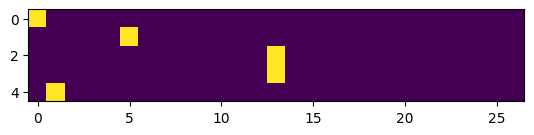

In [431]:
plt.imshow(xenc)

In [439]:
# weight iniitalization for NN (single layer single neuron)

w = torch.randn((27,1))  # 1 indicate single neuron in single layer
print(f"weight shape: {w.shape}")
print(f"weight: {w=}")


weight shape: torch.Size([27, 1])
weight: w=tensor([[-1.1026],
        [-0.1204],
        [-0.5806],
        [ 0.4622],
        [-0.2278],
        [ 0.2690],
        [-2.3869],
        [-0.8465],
        [ 1.1267],
        [-1.7791],
        [-0.6228],
        [-0.8351],
        [ 1.7430],
        [-0.0698],
        [-0.8407],
        [-1.5487],
        [ 1.9374],
        [-2.1029],
        [ 1.0362],
        [-0.0236],
        [-0.9955],
        [ 1.9082],
        [-1.9278],
        [-0.7638],
        [-0.6848],
        [-0.7301],
        [ 0.3129]])


In [440]:
# y = x @ w + b

qq = xenc @ w   # @ metrics multiplication
xenc.shape, w.shape, qq.shape


(torch.Size([5, 27]), torch.Size([27, 1]), torch.Size([5, 1]))

In [441]:
# weight iniitalization for NN (single layer single neuron)

w = torch.randn((27,27))  #   27 neuron in single layer
print(f"weight shape: {w.shape}")
print(f"weight: {w=}")


weight shape: torch.Size([27, 27])
weight: w=tensor([[ 4.8110e-01, -1.8577e-01,  1.8433e+00,  7.0268e-01,  4.8598e-01,
         -4.5728e-01, -1.2757e+00, -1.8990e+00,  1.2601e+00, -8.7816e-01,
          1.6781e+00,  1.2205e+00,  3.9857e-01,  4.5162e-01, -1.6984e+00,
          9.1913e-01, -2.6235e-01,  1.1903e+00,  3.4824e-01,  8.4483e-02,
          7.3061e-01, -1.4777e-01,  2.1959e-01,  1.2999e-01,  4.2735e-01,
         -2.8564e-01,  1.1069e+00],
        [ 7.6912e-01,  1.9126e-01,  1.6526e+00, -4.5474e-01, -2.3786e-01,
         -8.5419e-01, -2.6311e-01, -1.2496e+00,  7.7710e-01,  3.9634e-01,
          1.0549e+00,  6.3602e-01,  2.5002e+00, -2.7661e+00,  7.3083e-01,
         -7.0844e-02,  4.0711e-02, -2.5952e-01,  2.5867e-01,  2.9540e-01,
          3.0420e-01,  2.1107e-01, -2.3362e-01,  1.3964e+00, -7.9000e-01,
          3.1368e-01, -1.2708e-01],
        [-9.0716e-01, -4.5132e-01, -1.0348e+00,  2.5379e-01,  2.2891e+00,
          1.1636e+00, -1.2806e+00,  1.7422e+00, -2.1548e-01, -8.2373e

In [454]:
# y = x @ w + b

#log counts
# logits are haiving nos from -ive to +ive
# we can treat the o/p of w.x matrix as the metrix N seen eariler.
# eariler N = metrix of count of char to be come next after other char
# also converted N to prob ( values b/w 0 to 1)
# simliarly we named the the output :
# as log counts or logits
# bcz the logits can have values from -ive to +ive
# if we exp() the logits 
# it will convert in all -ive nos to +ive nos
    # e^-inf = 0
    # e^0 = 1
    # e^+inf = inf

# we will call it log counts equ to N metrix of numbers
# now convert it in probabitites: by div by its sum


logits = xenc @ w   # @ metrics multiplication
counts = logits.exp()
probs = counts / counts.sum(1, keepdim= True)


print(f"shape of xenc: {xenc.shape}")
print(f"shape of weight: {w.shape}")
print(f"shape of logits: {logits.shape}")
print(f"{logits=}")
print(f"{counts=}")
print(f"{probs=}")
print(f"sum; {probs.sum(1)}")





shape of xenc: torch.Size([5, 27])
shape of weight: torch.Size([27, 27])
shape of logits: torch.Size([5, 27])
logits=tensor([[ 0.4811, -0.1858,  1.8433,  0.7027,  0.4860, -0.4573, -1.2757, -1.8990,
          1.2601, -0.8782,  1.6781,  1.2205,  0.3986,  0.4516, -1.6984,  0.9191,
         -0.2623,  1.1903,  0.3482,  0.0845,  0.7306, -0.1478,  0.2196,  0.1300,
          0.4273, -0.2856,  1.1069],
        [-0.8247,  0.5248,  0.7039,  1.5750, -1.1604,  1.6532, -1.1806, -2.7865,
         -0.4526,  0.2479,  0.8269, -0.5911, -0.0300, -0.0114, -3.0586,  0.0567,
         -1.1113,  0.8492,  0.1806,  0.8708,  1.7923, -0.5568, -0.8001,  1.7593,
          0.8116, -1.2845,  1.2008],
        [ 0.7521,  1.4053,  0.9056,  1.1839, -0.1504,  2.2185, -0.3144, -0.4314,
         -0.2670,  0.5532,  0.1805, -0.1494,  0.9661, -1.4261, -0.2854, -1.8830,
          0.5867,  0.5302,  0.5076, -0.4477,  0.1297, -0.7416,  1.7119,  0.2649,
         -0.6579, -0.2026,  1.1604],
        [ 0.7521,  1.4053,  0.9056,  1.1839

In [456]:
probs.shape

torch.Size([5, 27])

In [458]:
# input
xs
# prob crossponds to desired out chr
probs[0,5], probs[1,13],probs[2,13],probs[3,1],probs[4,0]

tensor([ 0,  5, 13, 13,  1])

In [472]:
print(f"char input seq: \n{xs=}")
print(f"char output seq: \n{ys=}")
print(f"prob of each seq out given seq in in out probs:\n\
{probs[0,5], probs[1,13],probs[2,13],probs[3,1],probs[4,0]}")

char input seq: 
xs=tensor([ 0,  5, 13, 13,  1])
char output seq: 
ys=tensor([ 5, 13, 13,  1,  0])
prob of each seq out given seq in in out probs:
(tensor(0.0129), tensor(0.0208), tensor(0.0048), tensor(0.0807), tensor(0.0434))


In [478]:
# vectorise form of same expression
print(f"char input seq: \n{xs=}")
print(f"char output seq: \n{ys=}")
print(f"prob of each seq out given seq in in out probs:\n\
{probs[torch.arange(5),ys]}")

char input seq: 
xs=tensor([ 0,  5, 13, 13,  1])
char output seq: 
ys=tensor([ 5, 13, 13,  1,  0])
prob of each seq out given seq in in out probs:
tensor([0.0129, 0.0208, 0.0048, 0.0807, 0.0434])


In [481]:
# now create neg log likelyhood
loss = -probs[torch.arange(5), ys].log().mean()
print(f"{loss=}")

loss=tensor(3.8457)


In [ ]:
# explanation:
# summary:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts

#softmax:
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character

# btw: the last 2 lines here are together called a 'softmax'

In [482]:

nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0329, 0.0169, 0.1287, 0.0411, 0.0331, 0.0129, 0.0057, 0.0030, 0.0718,
        0.0085, 0.1091, 0.0690, 0.0303, 0.0320, 0.0037, 0.0511, 0.0157, 0.0670,
        0.0288, 0.0222, 0.0423, 0.0176, 0.0254, 0.0232, 0.0312, 0.0153, 0.0616])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012891178950667381
log likelihood: -4.351212024688721
negative log likelihood: 4.351212024688721
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0092, 0.0355, 0.0424, 0.1014, 0.0066, 0.1096, 0.0064, 0.0013, 0.0133,
        0.0269, 0.0480, 0.0116, 0.0204, 0.0208, 0.0010, 0.0222, 0.0069, 0.0491,
        0.0251, 0.0501, 0.1260, 0.0120, 0.0094, 0.1219, 0.0473, 0.0058, 0.0697])
label (actual next character): 13
probability assigned by the net to the the correct character: 0

In [485]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g ,requires_grad = True)


#forwardpass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

print(f"LOSS: {loss.item()}")
#backward pass

#set gradents to zeor
W.grad = None
loss.backward()

# weight update update
W.data   += -0.1 +W.grad

LOSS: 3.7693049907684326


In [486]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)


# gradient descent
for k in range(50):

  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())

  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()

  # update
  W.data += -50 * W.grad

number of examples:  228146
3.768618583679199
3.3788068294525146
3.161090850830078
3.0271859169006348
2.9344840049743652
2.867231607437134
2.8166542053222656
2.777146577835083
2.745253801345825
2.7188305854797363
2.696505308151245
2.6773719787597656
2.6608052253723145
2.6463515758514404
2.633665084838867
2.622471570968628
2.6125476360321045
2.6037068367004395
2.595794439315796
2.5886807441711426
2.5822560787200928
2.576429843902588
2.5711236000061035
2.566272735595703
2.5618226528167725
2.5577261447906494
2.5539445877075195
2.550442695617676
2.547192335128784
2.5441696643829346
2.5413522720336914
2.538722038269043
2.536262035369873
2.5339579582214355
2.531797409057617
2.529768228530884
2.527860164642334
2.5260636806488037
2.5243701934814453
2.522773265838623
2.52126407623291
2.519836664199829
2.5184857845306396
2.5172054767608643
2.515990734100342
2.5148372650146484
2.5137410163879395
2.51269793510437
2.511704921722412
2.5107579231262207


In [487]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
pxzfay.
a.
nn.


In [488]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    p = P[ix]
    # ----------
    # NOW:
    # xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    # logits = xenc @ W # predict log-counts
    # counts = logits.exp() # counts, equivalent to N
    # p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.


In [ ]:
# almost same result from both the approches 
# loss was also same for both the approaches

In [ ]:
# some left part :
# regularisation explained in it 